## Start with the training data
Use only 1% of the original traing data due to its large size.

In [1]:
import pandas as pd
#id col is not useful, skip it.
train = pd.read_csv('data/train_01.csv', usecols=list(range(1,6)))
#convert date string to datetime object
train['date'] = pd.to_datetime(train.date)
train.info()

/Users/wz12/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253617 entries, 0 to 1253616
Data columns (total 5 columns):
date           1253617 non-null datetime64[ns]
store_nbr      1253617 non-null int64
item_nbr       1253617 non-null int64
unit_sales     1253617 non-null float64
onpromotion    1038043 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.8+ MB


In [2]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,410257,1.0,NaN
1,2013-01-01,25,554047,2.0,NaN
2,2013-01-01,25,587186,2.0,NaN
3,2013-01-01,25,805788,1.0,NaN
4,2013-01-01,25,938566,1.0,NaN


Load the items.csv to clarify what kinds of items they are.

In [3]:
items = pd.read_csv('data/items.csv')
#merge two tables
train_new = train.merge(items, on='item_nbr', how='left')
train_new.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,2013-01-01,25,410257,1.0,NaN,GROCERY I,1072,0
1,2013-01-01,25,554047,2.0,NaN,GROCERY I,1044,0
2,2013-01-01,25,587186,2.0,NaN,CLEANING,3026,0
3,2013-01-01,25,805788,1.0,NaN,GROCERY I,1028,0
4,2013-01-01,25,938566,1.0,NaN,GROCERY I,1042,0


In [4]:
#date range of the data
train_new.date.describe()

count                 1253617
unique                   1684
top       2017-05-01 00:00:00
freq                     1230
first     2013-01-01 00:00:00
last      2017-08-15 00:00:00
Name: date, dtype: object

In [7]:
#The max looks suspicious, can be an outlier.
train_new.unit_sales.describe()

count    1.253617e+06
mean     8.553468e+00
std      2.306448e+01
min     -9.120000e+02
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      1.000200e+04
Name: unit_sales, dtype: float64

Text(0.5,0,'Sales Unit')

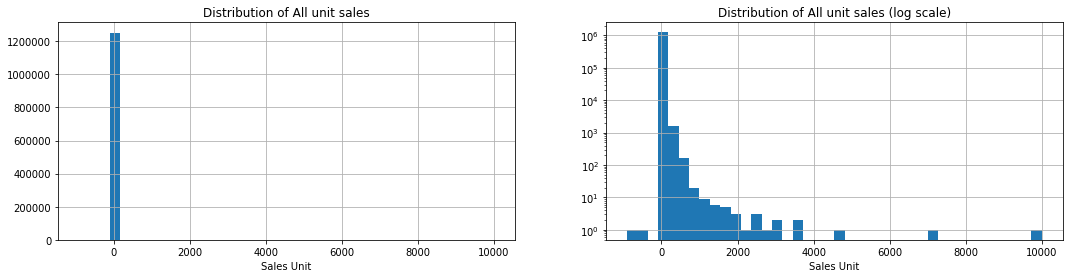

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots(1,2,figsize=(18,4))
train_new.unit_sales.hist(bins=40, ax=ax[0])
ax[0].set_title('Distribution of All unit sales')
ax[0].set_xlabel('Sales Unit')

train_new.unit_sales.hist(bins=40, log=True, ax=ax[1])
ax[1].set_title('Distribution of All unit sales (log scale)')
ax[1].set_xlabel('Sales Unit')

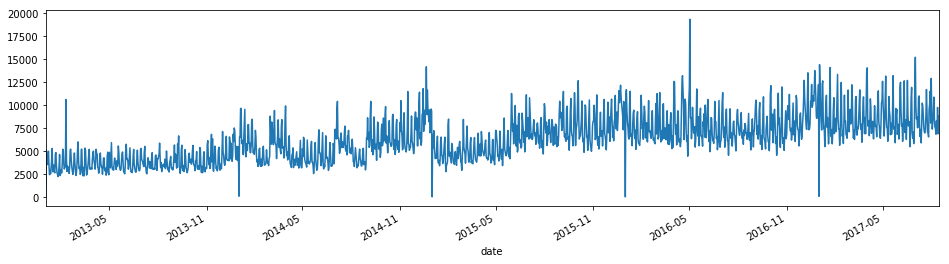

In [18]:
#Earthquake on 2016-04-16, a peak (outlier) can be seen on 2016-05-02
train_new.groupby('date')['unit_sales'].sum().plot(figsize=(16,4))

Check out some of the outliers, try to figure out what the typical sales value should be

In [36]:
train_new_sort = train_new.sort_values(['unit_sales'], ascending=False)
train_new_sort.head(20)

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
778014,2016-05-02,2,1078288,10002.000,False,GROCERY I,1004,0
15380,2013-02-08,45,161288,7001.000,NaN,GROCERY I,1072,0
377828,2014-12-21,50,557241,4734.450,False,FROZEN FOODS,2226,0
372888,2014-12-15,26,627885,3717.000,False,GROCERY I,1030,0
138222,2013-11-12,44,876663,3522.000,NaN,GROCERY I,1004,0
108735,2013-09-09,44,510054,3004.000,NaN,GROCERY I,1072,0
1238800,2017-08-01,42,1047793,2948.000,True,BEVERAGES,1138,0
367813,2014-12-08,35,1246784,2732.000,False,GROCERY I,1074,0
719393,2016-03-01,51,1239986,2517.600,False,POULTRY,2420,1
940641,2016-10-18,14,264299,2448.000,True,CLEANING,3032,0


On a normal day, how much does it sell for a typical item? (distribution) <br>
Use **median** to exclude most outliers.

Text(0.5,1,'Distribution of Median Daily Sales')

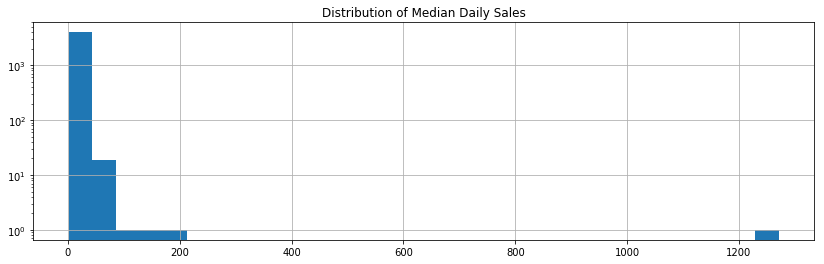

In [26]:
g = train_new.groupby(['item_nbr'])['unit_sales'].median().hist(figsize=(14,4), log=True, bins=30)
g.set_title('Distribution of Median Daily Sales')

In [33]:
#Still have a couple of outliers after taking the median values
train_new.groupby(['item_nbr'])['unit_sales'].median().sort_values(ascending=False)[:10]

item_nbr
1239986    1271.1255
1084365     206.0000
1503844     169.4645
583985      116.4140
2049003      80.0000
1402032      68.0000
1473474      65.0025
1167614      64.0000
1473404      61.0000
584028       59.0990
Name: unit_sales, dtype: float64

In [32]:
#This one only have two records, the 2nd one is likely an error, 2500 chicken a day seems unlikely!
#However, *2016-03-02 is a local Holiday: Fundacion de Manta
train_new.loc[train_new.item_nbr == 1239986]

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
220140,2014-04-09,51,1239986,24.651,False,POULTRY,2420,1
719393,2016-03-01,51,1239986,2517.600,False,POULTRY,2420,1


Text(0.5,1,'Distribution of Median Daily Sales')

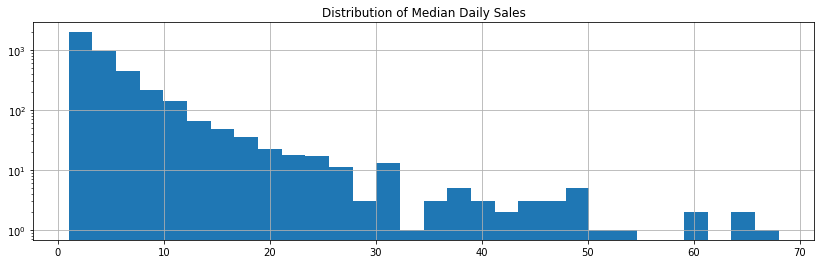

In [35]:
#remove the top 5 outliers with big sales, which are likely to be human errors
g = train_new.groupby(['item_nbr'])['unit_sales'].median().sort_values(ascending=False)[5:].hist(figsize=(14,4), log=True, bins=30)
g.set_title('Distribution of Median Daily Sales')

## For a specific item, how does the store affect its sales?
This function may be used in final prediction of any item sold at a particular store.

In [61]:
#Pick the item with the most records
for idx in train_new.item_nbr.value_counts()[:5].index:
    rows = train_new.loc[train_new['item_nbr'] == idx ]
    print("Item:{:8d}  Sales:{:5.1f}  Perishable: {} Type:{}".format(idx, rows.unit_sales.iloc[0], rows.perishable.iloc[0], rows.family.iloc[0]))

Item:  502331  Sales:100.0  Perishable: 1 Type:BREAD/BAKERY
Item:  314384  Sales: 29.0  Perishable: 0 Type:GROCERY I
Item:  759893  Sales: 82.0  Perishable: 0 Type:CLEANING
Item: 1047679  Sales: 57.0  Perishable: 0 Type:BEVERAGES
Item:  273528  Sales: 43.0  Perishable: 0 Type:PERSONAL CARE


Text(0.5,1,'Median Daily Sales per store')

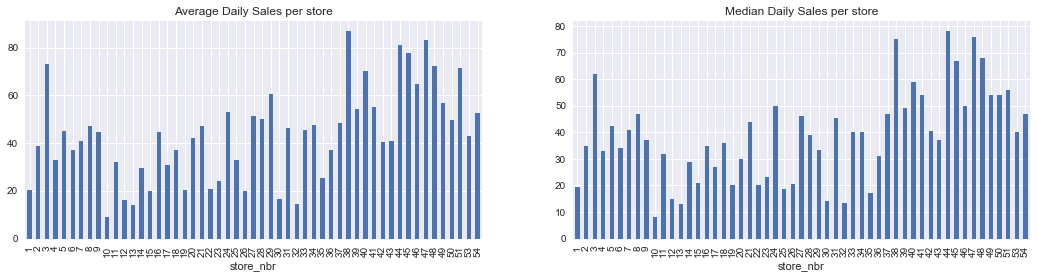

In [66]:
#pick the first item: bread
import seaborn as sns
bread = train_new.loc[train_new.item_nbr==502331]

fig,ax=plt.subplots(1,2,figsize=(18, 4))
bread.groupby('store_nbr')['unit_sales'].mean().plot.bar(ax=ax[0])
ax[0].set_title('Average Daily Sales per store')
bread.groupby('store_nbr')['unit_sales'].median().plot.bar(ax=ax[1])
ax[1].set_title('Median Daily Sales per store')

Same plots for dairy (item# 1471461), incomplete store info. (we are using only 1% of the full training set)

Text(0.5,1,'Median Daily Sales per store')

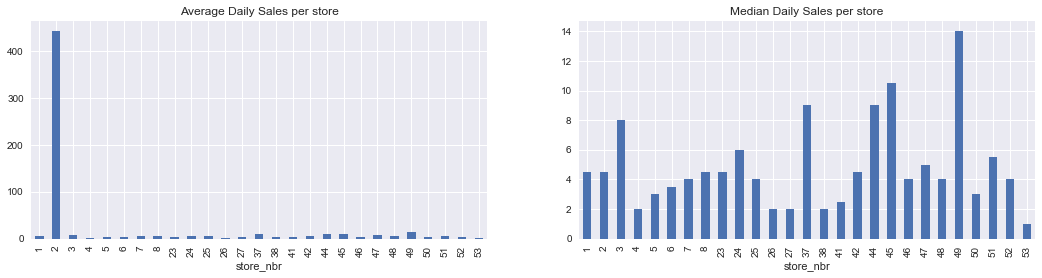

In [72]:
#Use median to handle outliers.
fig,ax=plt.subplots(1,2,figsize=(18, 4))
dairy = train_new.loc[train_new.item_nbr==1471461]
dairy.groupby('store_nbr')['unit_sales'].mean().plot.bar(ax=ax[0])
ax[0].set_title('Average Daily Sales per store')
dairy.groupby('store_nbr')['unit_sales'].median().plot.bar(ax=ax[1])
ax[1].set_title('Median Daily Sales per store')

In [73]:
#Is the first observation an input error?
dairy.sort_values('unit_sales',ascending=False).head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
997993,2016-12-15,2,1471461,1757.0,False,DAIRY,2128,1
986282,2016-12-03,44,1471461,23.0,True,DAIRY,2128,1
821802,2016-06-16,49,1471461,21.0,False,DAIRY,2128,1
661776,2015-12-30,37,1471461,20.0,False,DAIRY,2128,1
833010,2016-06-28,47,1471461,20.0,True,DAIRY,2128,1


## Transactions and store information:
The purpose is to examine the Time-Series information to watch for trends, this information may be used in future time series prediction.<br>
54 stores in total, store 44 has maximum average daily transactions ~ 4200 
1. some stores have more transactions than others (on these ~4100 items), it could be due to **location, store type, or cluster** <br>
2. some stores were open later and operated for less days.
3. **Average daily transactions for each store** can be an estimator later.

Text(0.5,1,'Average Daily Transactions for Each Store')

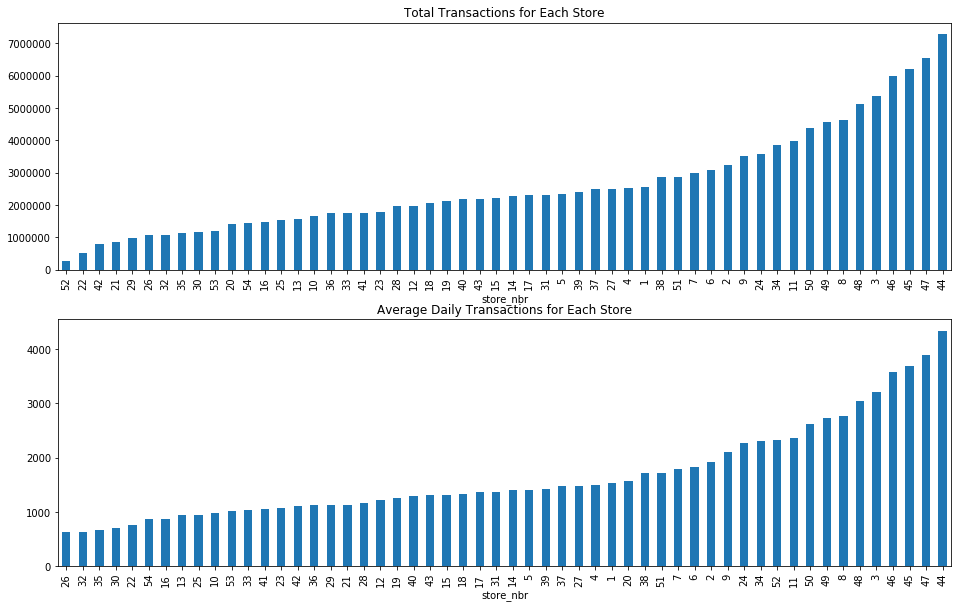

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,1,figsize=(16,10))
transactions.groupby('store_nbr')['transactions'].sum().sort_values().plot.bar(ax=ax[0])
ax[0].set_title('Total Transactions for Each Store')
(transactions.groupby('store_nbr')['transactions'].sum()/transactions.groupby('store_nbr')['date'].count()).sort_values().plot.bar(ax=ax[1])
ax[1].set_title('Average Daily Transactions for Each Store')

Text(0.5,1,'Total Daily Transactions subtracted by 7-day prior')

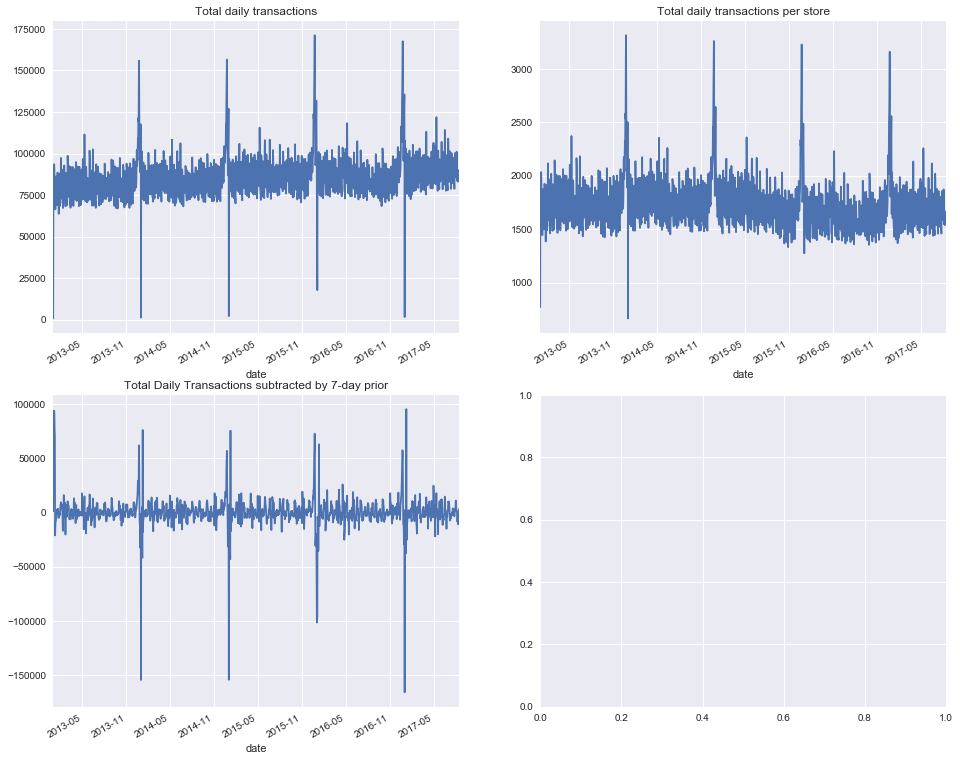

In [114]:
#The store number changes over time.

fig,ax = plt.subplots(2,2,figsize=(16,14))
gby = transactions.groupby('date')['transactions']
transactions.groupby('date')['transactions'].sum().plot(ax=ax[0][0])
ax[0][0].set_title('Total daily transactions')
(gby.sum()/transactions.groupby('date')['store_nbr'].count()).plot(ax=ax[0][1])
ax[0][1].set_title('Total daily transactions per store')

daily_transactions   = gby.sum()
shifted_transactions = daily_transactions.sub(daily_transactions.shift(7), fill_value=0)
#(shifted_transactions - np.mean(shifted_transactions)).plot(ax=ax[1])
shifted_transactions.plot(ax=ax[1][0])
ax[1][0].set_title('Total Daily Transactions subtracted by 7-day prior')

## Ramdom stuff below, not organized yet

Text(0.5,1,'Days each store opened')

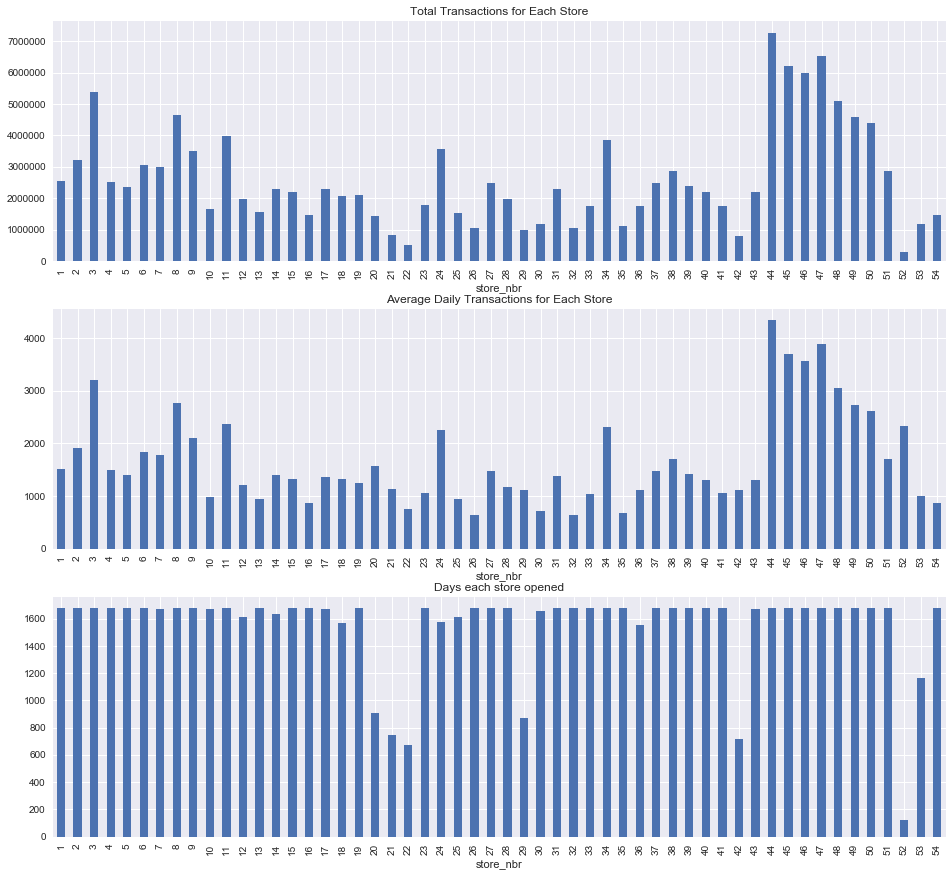

In [104]:
fig,ax = plt.subplots(3,1,figsize=(16,15))
transactions.groupby('store_nbr')['transactions'].sum().sort_index().plot.bar(ax=ax[0])
ax[0].set_title('Total Transactions for Each Store')
(transactions.groupby('store_nbr')['transactions'].sum()/transactions.groupby('store_nbr')['date'].count()).sort_index().plot.bar(ax=ax[1])
ax[1].set_title('Average Daily Transactions for Each Store')
transactions.groupby('store_nbr')['date'].count().sort_index().plot.bar(ax=ax[2])
ax[2].set_title('Days each store opened')

Time series for the Transactions:
1. the up trend in total daily transactions disappears when average over stores
2. Removing the week-based seasonality, may still have some other seasonality left, such as monthly, yearly.

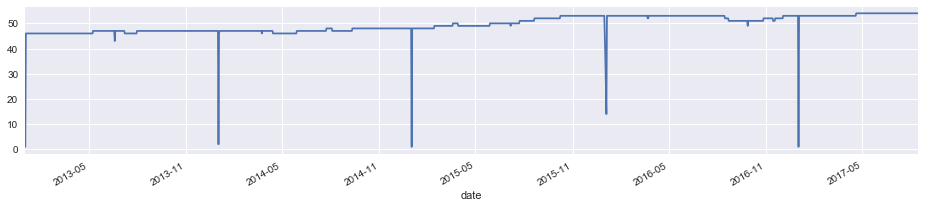

In [115]:
transactions.groupby('date')['store_nbr'].count().plot(figsize=(16,3))

Perishable items list, grouped by family

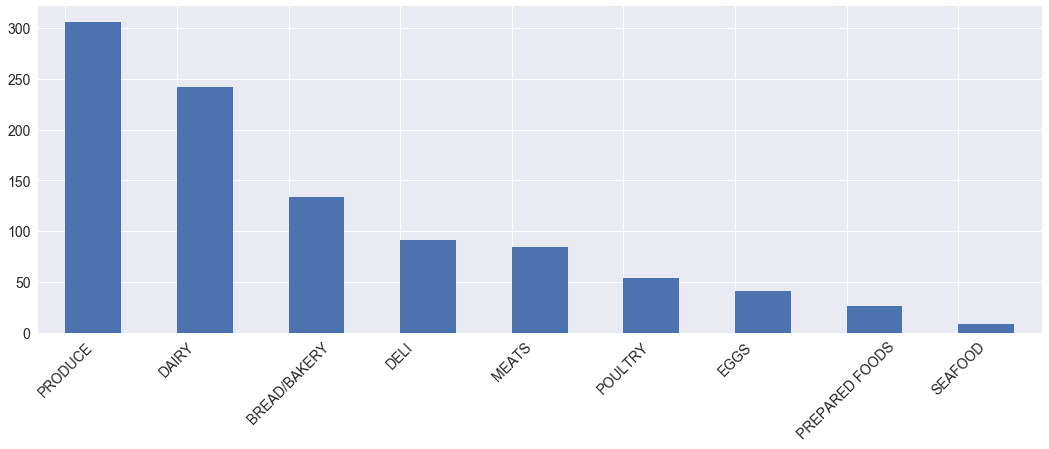

In [137]:
perishables = items.loc[items.perishable==1,'family']
perishables.value_counts().plot.bar(figsize=(18,6), rot=45,position=0,fontsize=14)

In [12]:
train.onpromotion.fillna(-1, inplace=True)
ids = train.onpromotion == -1
tmp_date = train.loc[ids, 'date']
max(tmp_date)

'2014-03-31'

In [6]:
!ls data/*.csv

data/holidays_events.csv   data/test.csv
data/items.csv             data/train.csv
data/oil.csv               data/train_001.csv
data/sample_submission.csv data/train_01.csv
data/stores.csv            data/transactions.csv


In [28]:
train['date']   = pd.to_datetime(train['date'])
train['year']   = train['date'].dt.year
train['month']  = train['date'].dt.month
train['weekday']= train['date'].dt.weekday

In [29]:
bread=train[train.item_nbr==502331]
bread.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,week,weekday
1126,113036,2013-01-04,44,502331,100.0,NaN,2013,1,1,4
2203,221923,2013-01-07,18,502331,16.0,NaN,2013,1,2,0
2328,234771,2013-01-07,40,502331,59.0,NaN,2013,1,2,0
2484,250596,2013-01-08,5,502331,57.0,NaN,2013,1,2,1
3162,320908,2013-01-09,49,502331,41.0,NaN,2013,1,2,2


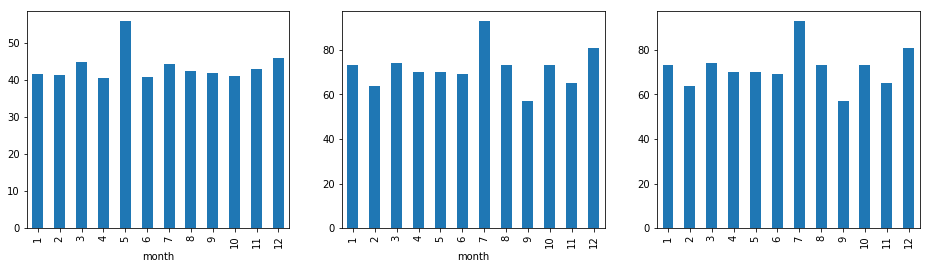

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
bread_month = bread.groupby('month')['unit_sales']
fig,ax = plt.subplots(1,3,figsize=(16,4))
(bread_month.sum()/bread_month.count()).plot.bar(ax=ax[0])
bread.groupby('month')['unit_sales'].count().plot.bar(ax=ax[1])
bread.month.value_counts().sort_index().plot.bar(ax=ax[2])

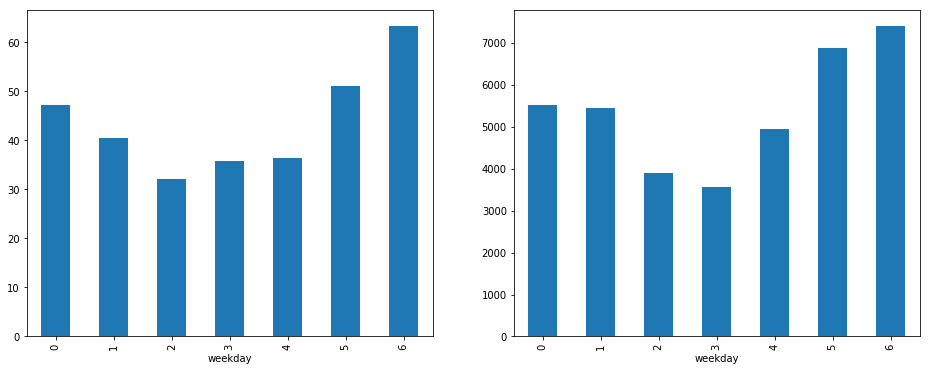

In [34]:
bread_weekday = bread.groupby('weekday')['unit_sales']
fig,ax = plt.subplots(1,2,figsize=(16,6))
(bread_weekday.sum()/bread_weekday.count()).plot.bar(ax=ax[0])
bread_weekday.sum().plot.bar(ax=ax[1])

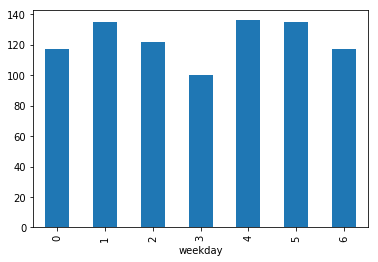

In [37]:
bread_weekday.count().plot.bar()

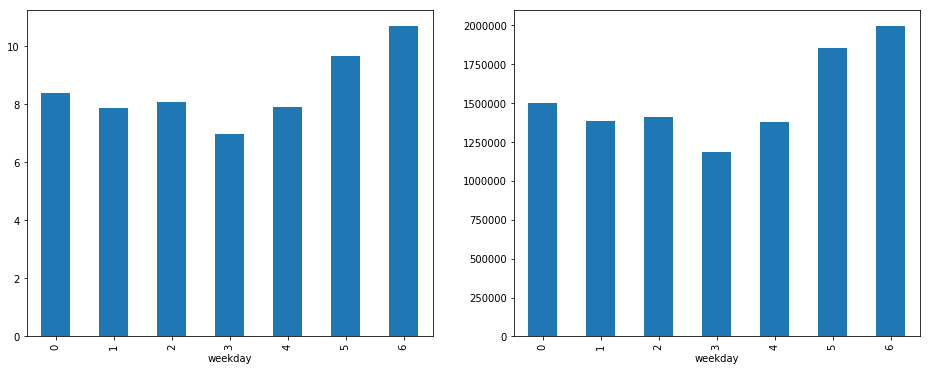

In [38]:
train_weekday = train.groupby('weekday')['unit_sales']
fig,ax = plt.subplots(1,2,figsize=(16,6))
(train_weekday.sum()/train_weekday.count()).plot.bar(ax=ax[0])
train_weekday.sum().plot.bar(ax=ax[1])

In [34]:
train.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
125200,125490304,2017-08-15,51,1114566,14.000,False
125201,125490800,2017-08-15,51,1463862,143.000,False
125202,125492750,2017-08-15,52,1239862,2.459,False
125203,125493311,2017-08-15,52,1658994,3.000,False
125204,125493705,2017-08-15,52,2011910,6.000,False


In [35]:
train.describe()

,id,store_nbr,item_nbr,unit_sales
count,1.252050e+05,125205.000000,1.252050e+05,125205.000000
mean,6.269894e+07,27.494158,9.710507e+05,8.562094
std,3.627837e+07,16.317239,5.209692e+05,20.391066
min,1.269000e+03,1.000000,9.699500e+04,-20.000000
25%,3.129300e+07,12.000000,5.179090e+05,2.000000
50%,6.253127e+07,28.000000,9.570980e+05,4.000000
75%,9.412931e+07,43.000000,1.354380e+06,9.000000
max,1.254937e+08,54.000000,2.124052e+06,1980.000000


In [33]:
n_days = len(train.date.unique())
n_items = 4100
print("Number of days with sales data:", n_days)
print("Average number of sales per item:{:.1f}".format(125497000/n_items))
print("Average number of sales per item per day:{:.1f}".format(125497000/n_items/n_days))

Number of days with sales data: 1682
Average number of sales per item:30609.0
Average number of sales per item per day:18.2


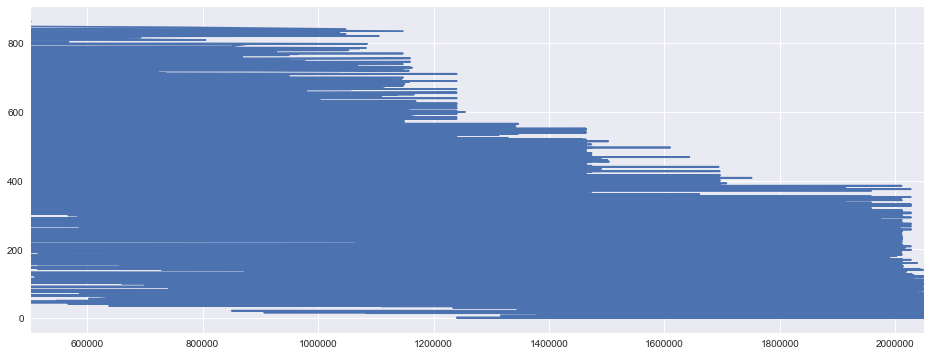

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(16,6))
train.item_nbr.value_counts().plot(ax=ax)


In [28]:
print(len(train.item_nbr.unique()))

3932


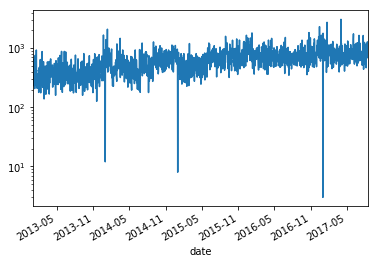

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
train.groupby('date')['unit_sales'].sum().plot(logy=True)

In [46]:
train.onpromotion.dropna().value_counts()

False    95887
True      7705
Name: onpromotion, dtype: int64

In [49]:
len(train.item_nbr.unique())

3932

In [17]:
train.memory_usage(index=True)

Index               80
id             1001640
date           1001640
store_nbr      1001640
item_nbr       1001640
unit_sales     1001640
onpromotion    1001640
dtype: int64

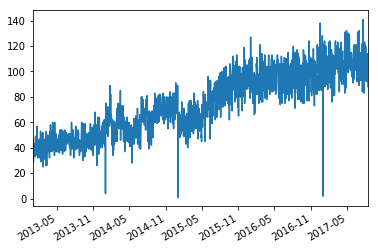

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
train.date.value_counts().plot()

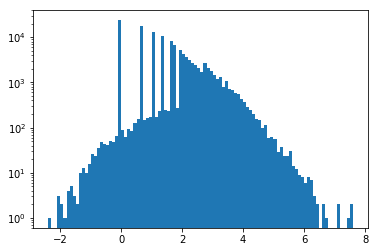

In [18]:
import numpy as np
_ = plt.hist(np.log(train.loc[train['unit_sales'] >0, 'unit_sales']), log=True, bins=100)

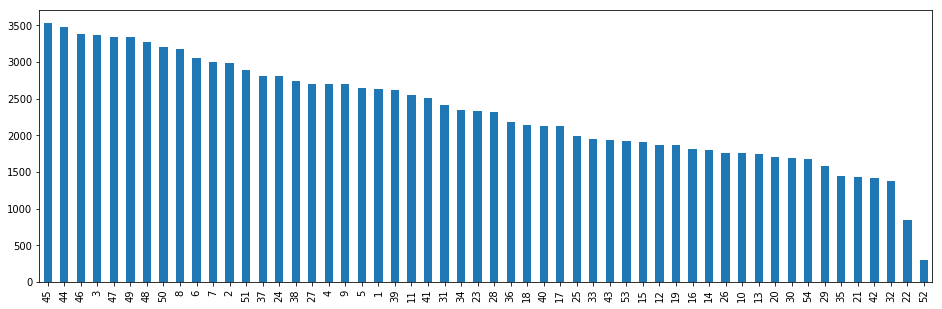

In [28]:
train.store_nbr.value_counts().plot.bar(figsize=(16,5))

In [29]:
items = pd.read_csv('data/items.csv')
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [50]:
print(len(items.family.unique()))

33


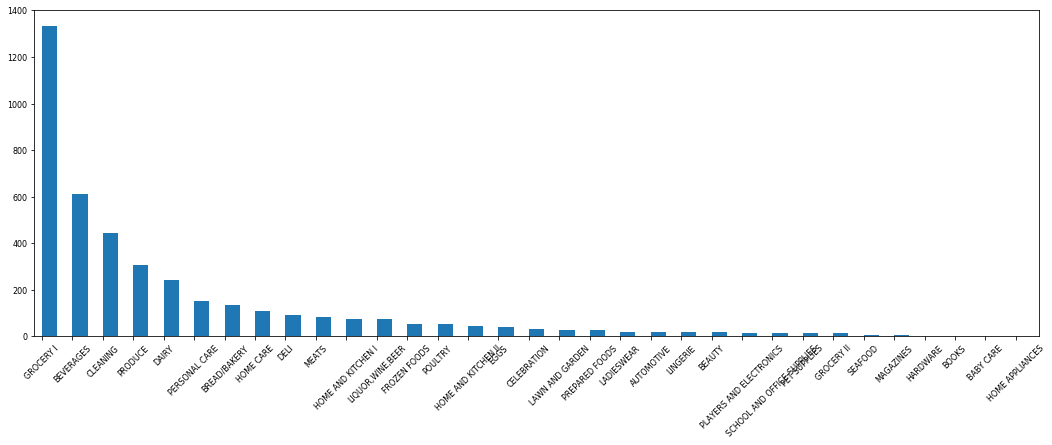

In [39]:
items.family.value_counts().plot.bar(figsize=(18,6), rot=45,position=0,fontsize=8)

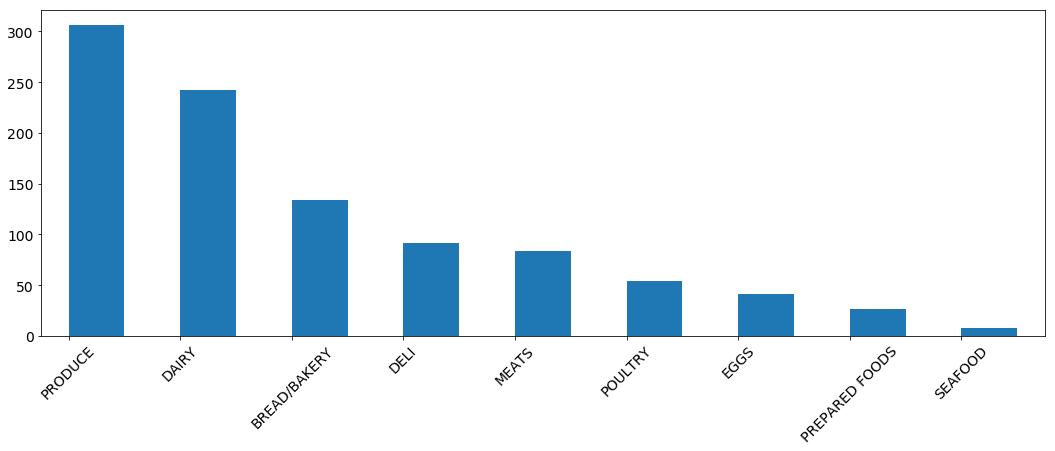

In [42]:
items.loc[items.perishable==1, 'family'].value_counts().plot.bar(figsize=(18,6), rot=45,position=0,fontsize=14)

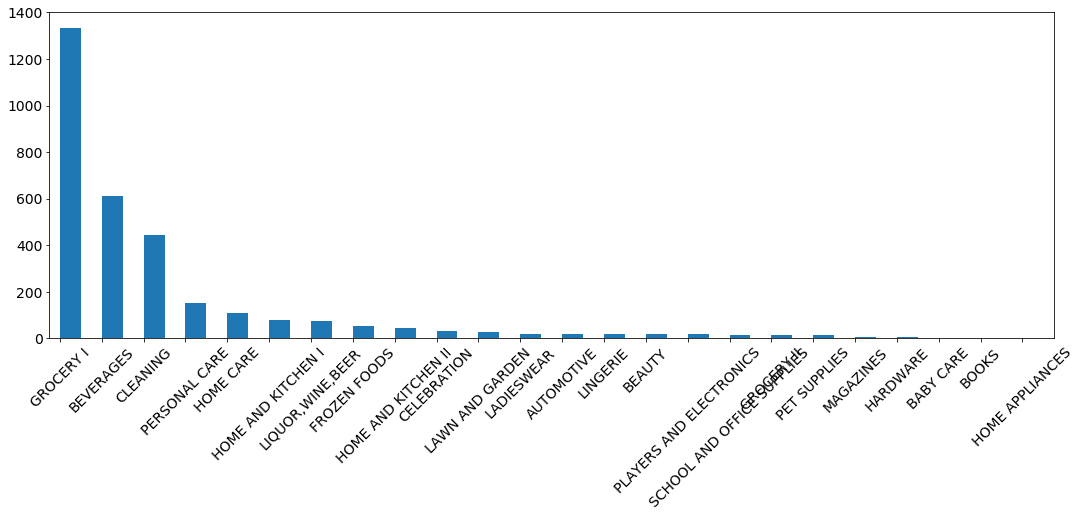

In [43]:
items.loc[items.perishable==0, 'family'].value_counts().plot.bar(figsize=(18,6), rot=45,position=0,fontsize=14)

In [51]:
len(train.date.unique())

1682

In [7]:
#train.set_index('id', inplace=True)
train.memory_usage(index=True)

Index          1003976320
date           1003976320
store_nbr      1003976320
item_nbr       1003976320
unit_sales     1003976320
onpromotion    1003976320
dtype: int64

In [19]:
import numpy as np
int_types = ["uint8", "int8", "int16", "int64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



In [9]:
train.store_nbr  = pd.to_numeric(train.store_nbr, downcast='unsigned')
train.unit_sales = pd.to_numeric(train.item_nbr, downcast='float')
#use map to convert columns
#d = {'Delivered': True, 'Undelivered': False}
#df['Status'].map(d)
#train.item_nbr   = pd.to_numeric(train.item_nbr, downcast='int32') #no int32 downcast

In [21]:
train.date  = pd.to_datetime(train.date)
#train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
date           125497040 non-null datetime64[ns]
store_nbr      125497040 non-null uint8
item_nbr       125497040 non-null int64
unit_sales     125497040 non-null float32
onpromotion    103839389 non-null object
dtypes: datetime64[ns](1), float32(1), int64(1), object(1), uint8(1)
memory usage: 9.3+ GB
